In [5]:
# command to  load the data ni to colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d joebeachcapital/restaurant-reviews

  0% 0.00/1.23M [00:00<?, ?B/s]
100% 1.23M/1.23M [00:00<00:00, 66.5MB/s]


In [7]:
# this will extract the all folder in colab
import zipfile
zip_ref = zipfile.ZipFile('/content/restaurant-reviews.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [8]:
# import liberaryes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import nltk
import warnings
warnings.filterwarnings("ignore")

In [9]:
data_path = "/content/Restaurant reviews.csv"
data = pd.read_csv(data_path)

In [10]:
# ratch only important columns
data = data[["Review","Rating"]]

In [11]:
data.head()

,Review,Rating
0,"The ambience was good, food was quite good . h...",5
1,Ambience is too good for a pleasant evening. S...,5
2,A must try.. great food great ambience. Thnx f...,5
3,Soumen das and Arun was a great guy. Only beca...,5
4,Food is good.we ordered Kodi drumsticks and ba...,5


In [12]:
data.tail()

,Review,Rating
9995,Madhumathi Mahajan Well to start with nice cou...,3
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4
9999,Checked in here to try some delicious chinese ...,3.5


In [13]:
# check the shape of data
data.shape

(10000, 2)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  9955 non-null   object
 1   Rating  9962 non-null   object
dtypes: object(2)
memory usage: 156.4+ KB


In [15]:
# now check with the null values in data
data.isnull().sum()

Review    45
Rating    38
dtype: int64

In [16]:
# drop all the null values from data
data.dropna(inplace=True)

In [17]:
# Now Check with the duplicated values
data.duplicated().sum()
# im keeping the duplicet value because of frequently repeting the document

549

In [18]:
# rename the column
data.rename(columns={"Review": "Text", "Rating": "Sentiment"}, inplace=True)

In [19]:
# check the unique values in the rating
data["Sentiment"].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [20]:
# convert this columns in to numeric and replace like with 5
# Mapping values to replace
replace_dict = {'5': 5, '4': 4, '3': 3, '2': 2, '1': 1, '3.5': 3.5, '4.5': 4.5, '2.5': 2.5, '1.5': 1.5, 'Like': 5}
data["Sentiment"] = data["Sentiment"].replace(replace_dict).astype(float)

In [21]:
# now give the sentiments to reatings grater then 3 is positive and less then 3 is negative
def sentiments(x):
  if x > 3:
    return "Positive"
  else:
    return "Negative"

data["Sentiment"] = data["Sentiment"].apply(sentiments)

In [22]:
# now see the value count of Sentiments
data["Sentiment"].value_counts()

Positive    6316
Negative    3639
Name: Sentiment, dtype: int64

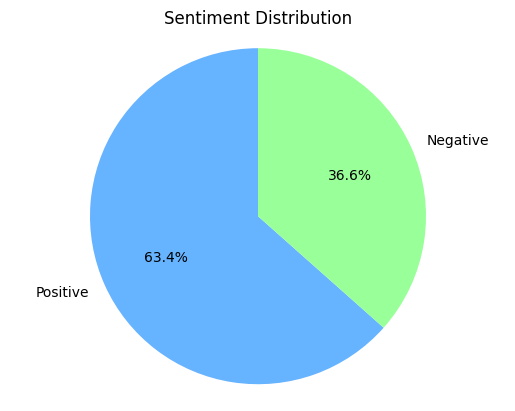

In [23]:
# Create a pie chart
sentiment_counts = data["Sentiment"].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

# Plotting
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Sentiment Distribution')

# Show the plot
plt.show()

In [24]:
# convert sentiments in to intiger
data["Sentiment"] = data["Sentiment"].map({"Positive":0,"Negative":1})

In [25]:
# Feature engeering and text pre processing
from  nltk.corpus import stopwords
import re
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from imblearn.over_sampling import SMOTE

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [26]:
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove newline characters
    text = text.replace('\n', ' ').replace('\r', '')

    # Remove words containing numbers
    text = ' '.join(word for word in text.split() if not any(char.isdigit() for char in word))

    # Convert to lowercase and tokenize
    tokens = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [27]:
data["Text"] = data["Text"].apply(preprocess_text)

In [28]:
# now split the dependent and indipendent feature
X = data["Text"]
y = data["Sentiment"]

In [29]:
from sklearn.model_selection import train_test_split
# Lets do train-test split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

7964 7964
1991 1991


In [30]:

print(f"shape of X_train :{x_train.shape}")
print(f"shape of y_train :{y_train.shape}")
print(f"shape of X_test :{x_test.shape}")
print(f"shape of y_test :{y_test.shape}")

shape of X_train :(7964,)
shape of y_train :(7964,)
shape of X_test :(1991,)
shape of y_test :(1991,)


In [31]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq = tokenizer.texts_to_sequences(x_test)

# Pad sequences to have consistent length
X_train_pad = pad_sequences(X_train_seq)
X_test_pad = pad_sequences(X_test_seq, maxlen=X_train_pad.shape[1])

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pad, y_train)

In [32]:
X_train_resampled.shape

(10156, 582)

In [33]:
y_train_resampled.shape

(10156,)

In [34]:
y_train_resampled.value_counts()

0    5078
1    5078
Name: Sentiment, dtype: int64

In [35]:
len(tokenizer.word_index)

15080

In [36]:
X_train_pad.shape[1]

582

In [40]:
max_words = 15080
max_len = 582

from keras.regularizers import l2
model = Sequential()

# Adding an Embedding layer with 100-dimensional vectors for each word, input_length is set to max_len
model.add(Embedding(max_words, 100, input_length=max_len))

# Adding Spatial Dropout to prevent overfitting by dropping entire 1D feature maps
model.add(SpatialDropout1D(0.2))

# Adding the first LSTM layer with 100 units, dropout for input and recurrent connections is set to 0.2
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True, kernel_regularizer=l2(0.01)))

# The return_sequences=True parameter is added to return the full sequence for the next LSTM layer

# Adding a second LSTM layer with 100 units, dropout for input and recurrent connections is set to 0.2
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))

# Adding a Dense layer with a single output unit and sigmoid activation for binary classification
model.add(Dense(1, activation="sigmoid"))

# Displaying the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 582, 100)          1508000   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 582, 100)          0         
 alDropout1D)                                                    
                                                                 
 lstm (LSTM)                 (None, 582, 100)          80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1668901 (6.37 MB)
Trainable params: 1668901 (6.37 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [41]:
#now compile the model
import tensorflow as tf

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [43]:
# starting model training
history = model.fit(X_train_resampled,y_train_resampled,batch_size=84,epochs = 10,validation_split=0.2)

Epoch 1/10
97/97 [==============================] - 377s 4s/step - loss: 1.5429 - accuracy: 0.6988 - val_loss: 1.0753 - val_accuracy: 0.3430
Epoch 2/10
97/97 [==============================] - 376s 4s/step - loss: 0.4343 - accuracy: 0.8312 - val_loss: 1.4467 - val_accuracy: 0.2923
Epoch 3/10
97/97 [==============================] - 368s 4s/step - loss: 0.4417 - accuracy: 0.8448 - val_loss: 1.1896 - val_accuracy: 0.3780
Epoch 4/10
97/97 [==============================] - 371s 4s/step - loss: 0.3320 - accuracy: 0.8810 - val_loss: 1.4422 - val_accuracy: 0.3012
Epoch 5/10
97/97 [==============================] - 366s 4s/step - loss: 0.2802 - accuracy: 0.9055 - val_loss: 1.3007 - val_accuracy: 0.4631
Epoch 6/10
97/97 [==============================] - 367s 4s/step - loss: 0.2384 - accuracy: 0.9215 - val_loss: 1.5723 - val_accuracy: 0.4281
Epoch 7/10
97/97 [==============================] - 371s 4s/step - loss: 0.2080 - accuracy: 0.9335 - val_loss: 1.8437 - val_accuracy: 0.3750
Epoch 8/10
97

In [44]:
# test on test data
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [45]:

# Model evaluation
accr = model.evaluate(test_sequences_matrix,y_test)

63/63 [==============================] - 21s 333ms/step - loss: 0.6697 - accuracy: 0.8332


In [46]:
lstm_prediction = model.predict(test_sequences_matrix)

63/63 [==============================] - 21s 320ms/step


In [47]:

lstm_prediction

array([[9.5241726e-04],
       [5.6936336e-01],
       [9.8918331e-01],
       ...,
       [9.9175668e-01],
       [9.9975425e-01],
       [8.7140324e-03]], dtype=float32)

In [48]:
res = []
for prediction in lstm_prediction:
    if prediction[0] < 0.5:
        res.append(0)
    else:
        res.append(1)

In [50]:

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,res))

[[1102  136]
 [ 196  557]]
